In [217]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [218]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/master/AnalysisData.xlsx%20-%20AnalysisData.csv'
df2 = pd.read_csv(url)
# To identify the type of data
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CumOil12Month                     6098 non-null   float64
 1   rowID                             6098 non-null   int64  
 2   Operator                          6098 non-null   object 
 3   CompletionDate                    6098 non-null   object 
 4   Reservoir                         6098 non-null   object 
 5   LateralLength_FT                  6096 non-null   float64
 6   ProppantIntensity_LBSPerFT        5661 non-null   float64
 7   FluidIntensity_BBLPerFT           5793 non-null   float64
 8   HzDistanceToNearestOffsetAtDrill  5890 non-null   float64
 9   HzDistanceToNearestOffsetCurrent  5890 non-null   float64
 10  VtDistanceToNearestOffsetCurrent  5890 non-null   float64
 11  VtDistanceToNearestOffsetAtDrill  5890 non-null   float64
 12  WellDe

In [219]:
# Create separate object for input features
df2 = df2.drop('rowID', axis=1)
#df2 = df2.drop('Operator', axis=1)
#df2 = df2.drop('Reservoir', axis=1)
df2 = df2.drop('CompletionDate', axis=1)

df2.head()

,CumOil12Month,Operator,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,...,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM
0,325341.6875,OVV,WOLFCAMP B,9925.0,2061.0,49.0,275.089,275.089,9.258,258.263,...,22821.2075,0.056,4150.9728,0.426,0.011,3.1119,0.169,0.257,0.943,5.5592
1,211278.4063,OVV,SPRABERRY LOWER SHALE,9478.0,2042.0,48.0,300.346,300.346,3.120,231.585,...,30333.5230,0.055,2927.7631,0.319,0.005,2.8506,0.227,0.144,0.941,5.2283
2,201117.6094,OVV,SPRABERRY LOWER SHALE,9295.0,2145.0,NaN,299.140,299.140,228.466,228.466,...,16238.1090,0.047,2230.7591,0.445,0.006,1.9771,0.173,0.177,0.944,5.2176
3,297255.6250,OVV,WOLFCAMP A,9894.0,1995.0,NaN,274.886,274.886,249.005,249.005,...,24069.5400,0.048,3267.3561,0.311,0.003,2.5054,0.166,0.338,0.941,5.3567
4,240883.1875,OVV,WOLFCAMP B,10403.0,2007.0,49.0,291.223,291.223,219.828,219.828,...,24158.2750,0.057,4188.9816,0.386,0.009,3.0660,0.162,0.280,0.941,5.6994


In [220]:
#descriptive statistics summary
df2['CumOil12Month'].describe()

count      6098.000000
mean     123642.826485
std       67495.041834
min           0.000000
25%       74468.750000
50%      113074.500000
75%      161959.931400
max      598316.812500
Name: CumOil12Month, dtype: float64

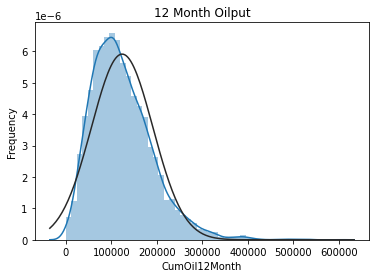

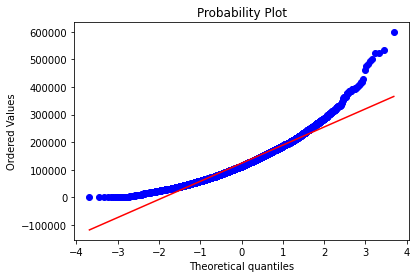

In [221]:
# Kernel Density Plot
sns.distplot(df2.CumOil12Month,fit=norm);
plt.ylabel('Frequency')
plt.title('12 Month Oilput');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df2['CumOil12Month']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(df2['CumOil12Month'], plot=plt)
plt.show()

The target variable is right skewed(positive skewness) and show peakedness. As (linear) models fits better on normally distributed data , we require proper transformation.

1. Transform the skewed numeric features by taking log(feature + 1) - to make features more normal


## Relationship Exploration for Numerical 

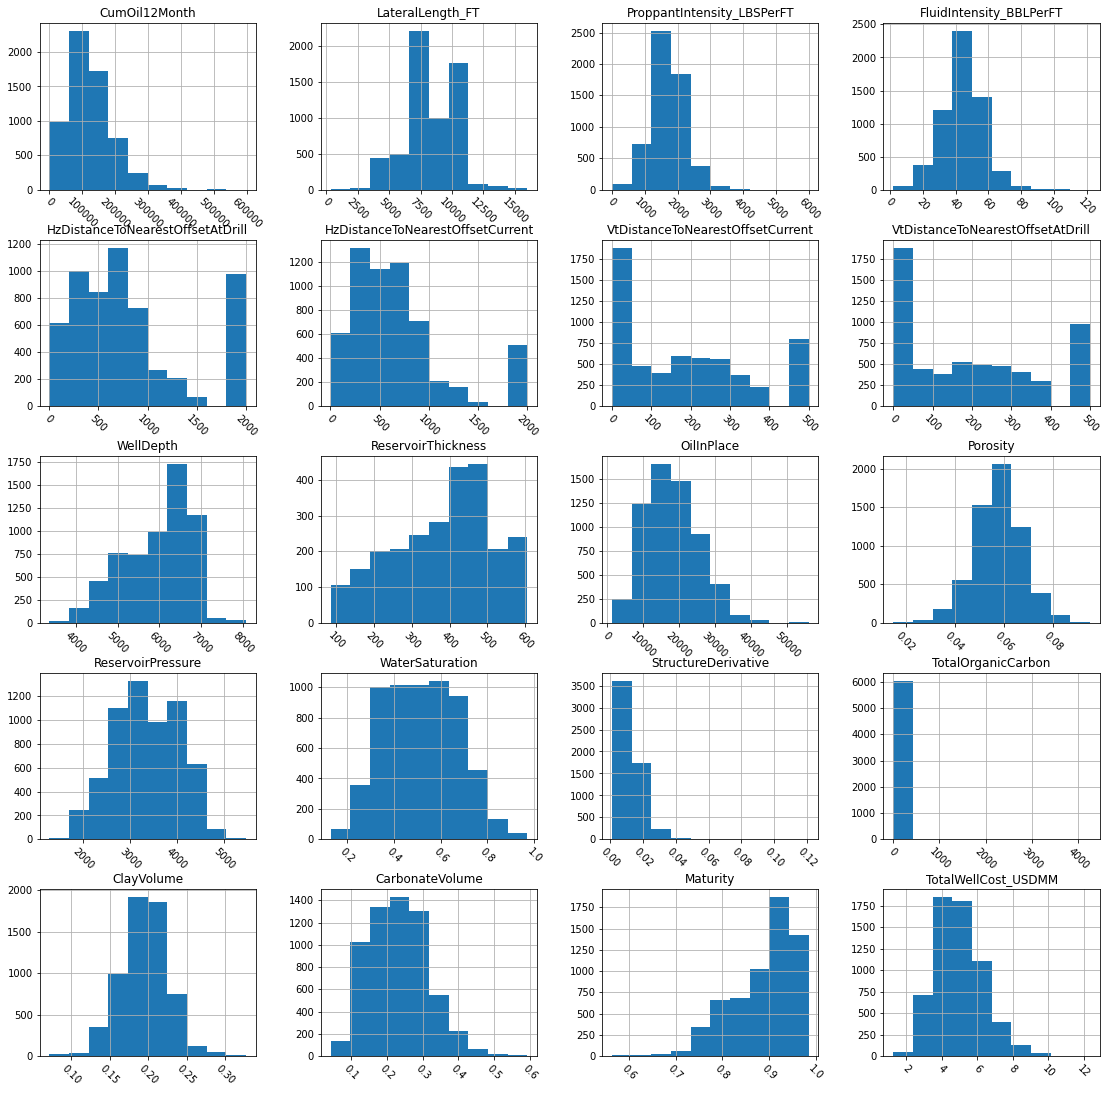

In [222]:
# Plot histogram grid
df2.hist(figsize=(19,19), xrot=-45)

# Clear the text "residue"
plt.show()

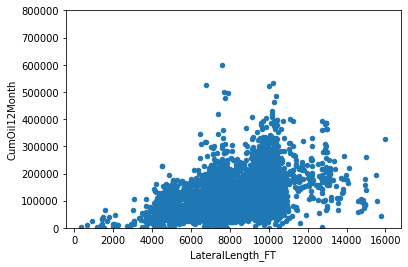

In [223]:
#scatter plot LateralLength/CumOil12Month
var = 'LateralLength_FT'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

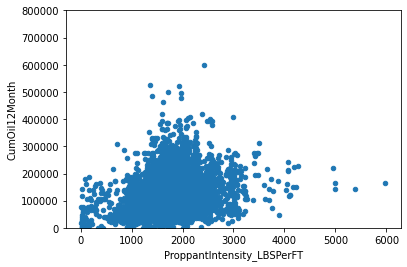

In [224]:
#scatter plot ProppantIntensity_LBSPerFT/CumOil12Month
var = 'ProppantIntensity_LBSPerFT'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

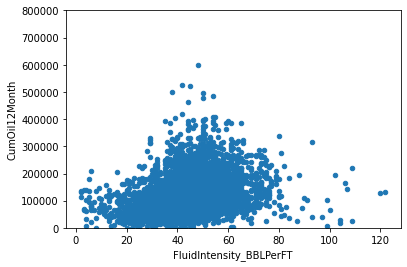

In [225]:
#scatter plot FluidIntensity_BBLPerFT/CumOil12Month
var = 'FluidIntensity_BBLPerFT'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

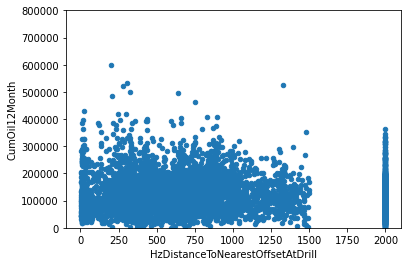

In [226]:
#scatter plot HzDistanceToNearestOffsetAtDrill/CumOil12Month
var = 'HzDistanceToNearestOffsetAtDrill'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

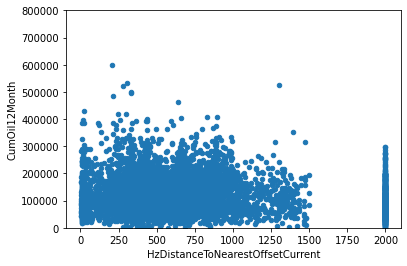

In [227]:
#scatter plot HzDistanceToNearestOffsetCurrent/CumOil12Month
var = 'HzDistanceToNearestOffsetCurrent'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

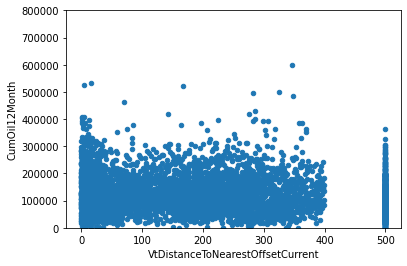

In [228]:
#scatter plot VtDistanceToNearestOffsetCurrent/CumOil12Month
var = 'VtDistanceToNearestOffsetCurrent'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

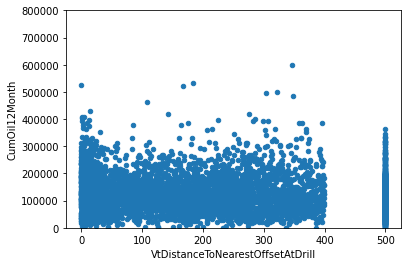

In [229]:
#scatter plot VtDistanceToNearestOffsetAtDrill/CumOil12Month
var = 'VtDistanceToNearestOffsetAtDrill'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

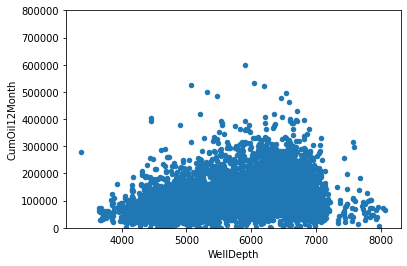

In [230]:
#scatter plot WellDepth/CumOil12Month
var = 'WellDepth'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

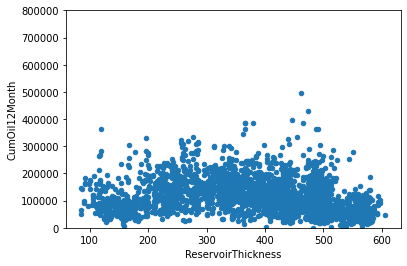

In [231]:
#scatter plot ReservoirThickness/CumOil12Month
var = 'ReservoirThickness'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

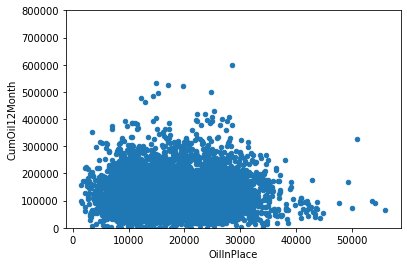

In [232]:
#scatter plot OilInPlace/CumOil12Month
var = 'OilInPlace'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

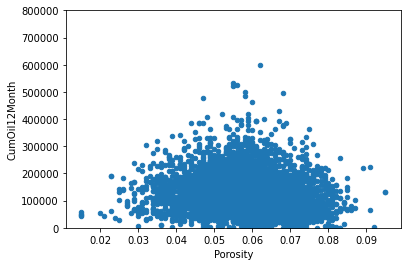

In [233]:
#scatter plot Porosity/CumOil12Month
var = 'Porosity'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

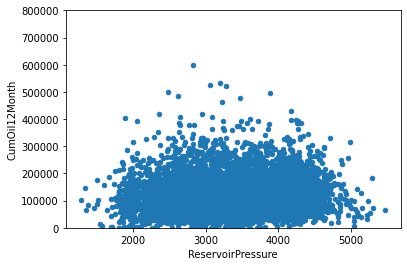

In [234]:
#scatter plot ReservoirPressure/CumOil12Month
var = 'ReservoirPressure'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

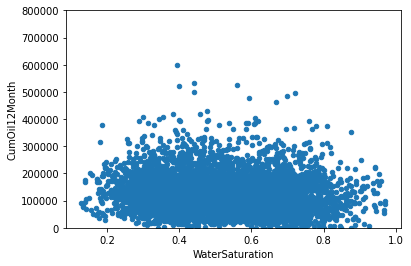

In [235]:
#scatter plot WaterSaturation/CumOil12Month
var = 'WaterSaturation'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

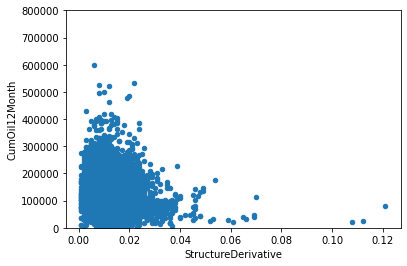

In [236]:
#scatter plot StructureDerivative/CumOil12Month
var = 'StructureDerivative'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

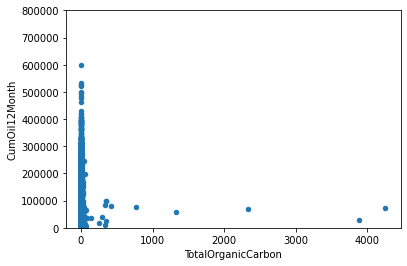

In [237]:
#scatter plot TotalOrganicCarbon/CumOil12Month
var = 'TotalOrganicCarbon'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

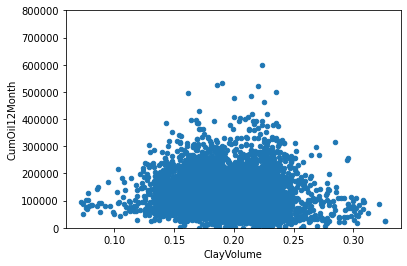

In [238]:
#scatter plot ClayVolume/CumOil12Month
var = 'ClayVolume'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

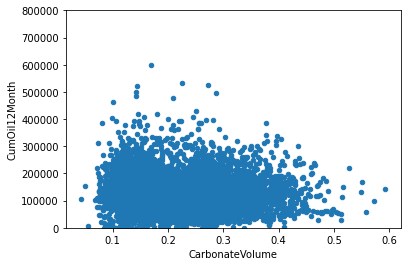

In [239]:
#scatter plot CarbonateVolume/CumOil12Month
var = 'CarbonateVolume'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

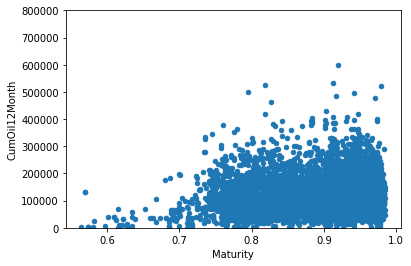

In [240]:
#scatter plot Maturity/CumOil12Month
var = 'Maturity'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

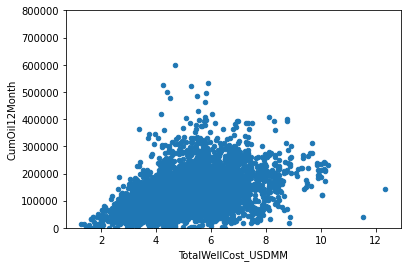

In [241]:
#scatter plot TotalWellCost_USDMM/CumOil12Month
var = 'TotalWellCost_USDMM'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
data.plot.scatter(x=var, y='CumOil12Month', ylim=(0,800000));

for maximum model success, the features that are the most "linear" should probably be used, there is a interative way to do this in more advanced example



# Relation Exploration for categorical Features


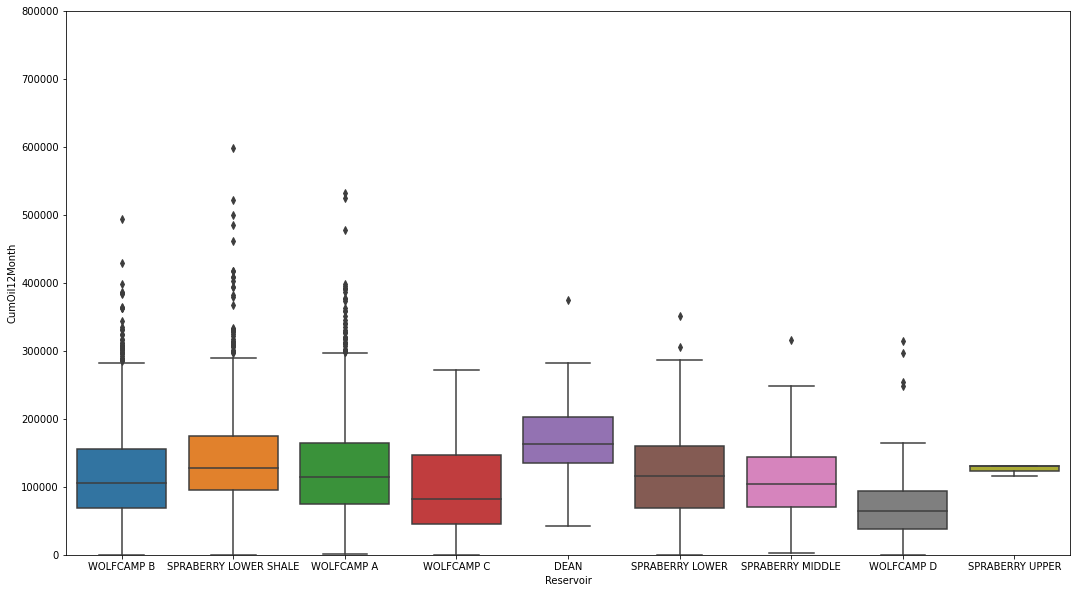

In [242]:
#box plot overallqual/TotalWellCost_USDMM
var = 'Reservoir'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x=var, y="CumOil12Month", data=df2)
fig.axis(ymin=0, ymax=800000);

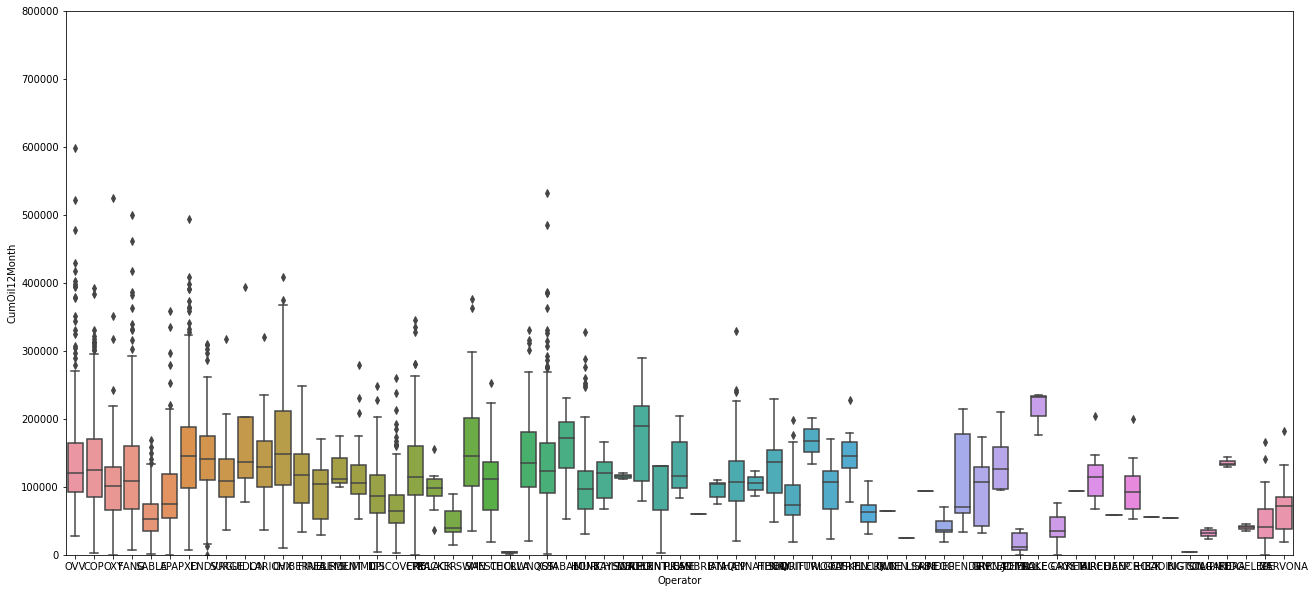

In [243]:
#box plot overallqual/TotalWellCost_USDMM
var = 'Operator'
data = pd.concat([df2['CumOil12Month'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(22, 10))
fig = sns.boxplot(x=var, y="CumOil12Month", data=df2)
fig.axis(ymin=0, ymax=800000);

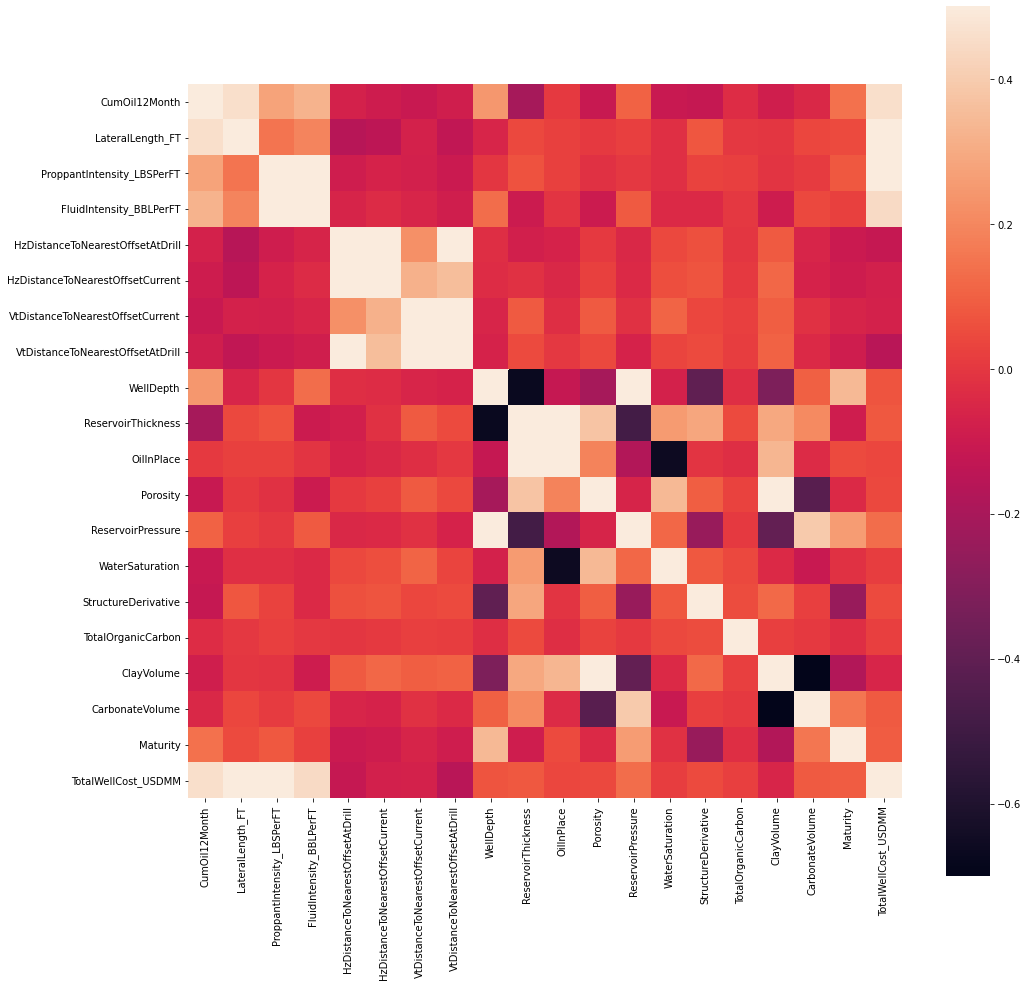

In [244]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.5, square=True);

In [245]:
#skewness and kurtosis
print("Skewness: %f" % df2['CumOil12Month'].skew())
print("Kurtosis: %f" % df2['CumOil12Month'].kurt())

Skewness: 1.090951
Kurtosis: 2.398886


Kurtosis being > +1 measn the distribution is very peaked, additionally skewness >1 also right skewed

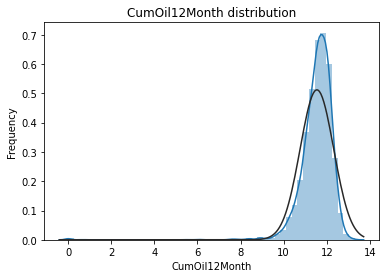

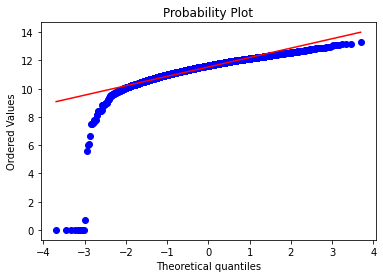

In [246]:
#log transform the target:
df2['CumOil12Month'] = np.log1p(df2['CumOil12Month'])

# Kernel Density Plot
sns.distplot(df2.CumOil12Month,fit=norm);
plt.ylabel('Frequency')
plt.title('CumOil12Month distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df2['CumOil12Month']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(df2['CumOil12Month'], plot=plt)
plt.show()

In [247]:
y = df2.CumOil12Month
all_data = df2.drop('CumOil12Month', axis=1)



In [248]:
#Label Encoding some categorical variables 
# for information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('Operator',	'Reservoir')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (6098, 21)


In [249]:
# To identify the type of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6098 entries, 0 to 6097
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CumOil12Month                     6098 non-null   float64
 1   Operator                          6098 non-null   object 
 2   Reservoir                         6098 non-null   object 
 3   LateralLength_FT                  6096 non-null   float64
 4   ProppantIntensity_LBSPerFT        5661 non-null   float64
 5   FluidIntensity_BBLPerFT           5793 non-null   float64
 6   HzDistanceToNearestOffsetAtDrill  5890 non-null   float64
 7   HzDistanceToNearestOffsetCurrent  5890 non-null   float64
 8   VtDistanceToNearestOffsetCurrent  5890 non-null   float64
 9   VtDistanceToNearestOffsetAtDrill  5890 non-null   float64
 10  WellDepth                         6097 non-null   float64
 11  ReservoirThickness                2523 non-null   float64
 12  OilInP

## Transformation of (highly) skewed features

In [250]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) #compute skewness
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(5)


Skew in numerical features: 



,Skew
TotalOrganicCarbon,43.269488
StructureDerivative,2.880671
HzDistanceToNearestOffsetCurrent,1.408577
HzDistanceToNearestOffsetAtDrill,0.896770
ProppantIntensity_LBSPerFT,0.670941


In [251]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 21 skewed numerical features to Box Cox transform


In [252]:
#create dummy variables for Operator and Reservior
df2 = pd.get_dummies(df2, columns=['Operator','Reservoir'], drop_first = True)
df2.head(5)

,CumOil12Month,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,ReservoirThickness,...,Operator_XOM,Operator_ZARVONA,Reservoir_SPRABERRY LOWER,Reservoir_SPRABERRY LOWER SHALE,Reservoir_SPRABERRY MIDDLE,Reservoir_SPRABERRY UPPER,Reservoir_WOLFCAMP A,Reservoir_WOLFCAMP B,Reservoir_WOLFCAMP C,Reservoir_WOLFCAMP D
0,12.692634,9925.0,2061.0,49.0,275.089,275.089,9.258,258.263,6818.863,439.838,...,0,0,0,0,0,0,0,1,0,0
1,12.260937,9478.0,2042.0,48.0,300.346,300.346,3.120,231.585,6149.570,NaN,...,0,0,0,1,0,0,0,0,0,0
2,12.211650,9295.0,2145.0,NaN,299.140,299.140,228.466,228.466,5917.984,NaN,...,0,0,0,1,0,0,0,0,0,0
3,12.602351,9894.0,1995.0,NaN,274.886,274.886,249.005,249.005,6560.600,NaN,...,0,0,0,0,0,0,1,0,0,0
4,12.392072,10403.0,2007.0,49.0,291.223,291.223,219.828,219.828,6809.605,442.147,...,0,0,0,0,0,0,0,1,0,0


In [253]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.CumOil12Month
train = df2.sample(frac=0.8, random_state=25)
test = df2.drop(train.index)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 4878
No. of testing examples: 1220


### Regression Modeling

In [254]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

For Cross-validation purpose we can use cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code on Alexandru function, in order to shuffle the dataset prior to cross-validation

In [255]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Implementing Regression Models
1. Lasso Regression
2. Kernel Ridge Regression
3. Elastic Net Regression
4. Gradient Boosting Regression
5. XGBoost
6. Light GBM

In [256]:
#1
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#2
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#3
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#4
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#5
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)
#6
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [257]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: nan (nan)

Kernel Ridge score: nan (nan)

ElasticNet score: nan (nan)

Gradient Boosting score: nan (nan)

Xgboost score: 0.1000 (0.0338)

LGBM score: 0.3180 (0.0967)



## Stacking Models
# Approach: Averaging Base Models

In [259]:
#Average Based models class

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (model_xgb, model_lgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1980 (0.0606)



In [260]:
# Defining rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [261]:
#Final Training and Prediction

#StackedRegressor:

averaged_models.fit(train.values, y_train)
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.09402903482831654


In [262]:
# XGBoost

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

# LightGBM

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.03255338735366551
0.17483939514246072


In [263]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.09402903394610736


In [264]:
# Ensembled Predictions:

ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

Root Mean Squared Logarithmic Error (RMSLE)
It is the Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.
RMSLE is robust to outliers where the small and the large errors are treated evenly.
Note that the best RMSLE score for random predictions (around 2.34) is not better than the best constant prediction

it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy.


# Second Attempt Model

In [331]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
from pylab import rcParams
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import Libraries
# Scikit-Learn for Modeling
import sklearn
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from xgboost import XGBRegressor
# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [332]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/a7c45963d1a677dd0a758900b58a662b3179f30b/QEPSampleCleaned.csv'
df3 = pd.read_csv(url)
# To identify the type of data
df3.head()

,CumOil12Month,rowID,Operator,CompletionDate,DaysSinceStruck,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,PSI_PerSqf_Thick,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM
0,325341.688,1,OVV,2017-09-30,1751,WOLFCAMP B,9925.000,2061.000,49,275.089,275.089,9.258,258.263,6818.863,0.106,439.838,22821.208,0.056,4150.973,0.426,0.011,3.112,0.169,0.257,0.943,5.559
1,211278.406,2,OVV,2017-10-07,1744,SPRABERRY LOWER,9478.000,2042.000,48,300.346,300.346,3.120,231.585,6149.570,2.476,7250.000,30333.523,0.055,2927.763,0.319,0.005,2.851,0.227,0.144,0.941,5.228
2,201117.609,3,OVV,2017-10-07,1744,SPRABERRY LOWER,9295.000,2145.000,53,299.140,299.140,228.466,228.466,5917.984,3.250,7250.000,16238.109,0.047,2230.759,0.445,0.006,1.977,0.173,0.177,0.944,5.218
3,297255.625,4,OVV,2017-08-11,1801,WOLFCAMP A,9894.000,1995.000,49,274.886,274.886,249.005,249.005,6560.600,2.525,8250.000,24069.540,0.048,3267.356,0.311,0.003,2.505,0.166,0.338,0.941,5.357
4,240883.188,5,OVV,2017-08-16,1796,WOLFCAMP B,10403.000,2007.000,49,291.223,291.223,219.828,219.828,6809.605,0.106,442.147,24158.275,0.057,4188.982,0.386,0.009,3.066,0.162,0.280,0.941,5.699


Second Attempt is to remove categorical variables, limit features and add PSI per sq foot of thickness as added feature


In [333]:
#create dummy variables for Operator and Reservior
#df2 = pd.get_dummies(df2, columns=['Operator','Reservoir'], drop_first = True)
#df2.head(50)
# Create separate object for input features
df3 = df3.drop('rowID', axis=1)
df3 = df3.drop('Operator', axis=1)
df3 = df3.drop('Reservoir', axis=1)
df3 = df3.drop('CompletionDate', axis=1)
df3 = df3.drop('Porosity', axis=1)
df3 = df3.drop('LateralLength_FT', axis=1)
df3 = df3.drop('HzDistanceToNearestOffsetAtDrill', axis=1)
df3 = df3.drop('HzDistanceToNearestOffsetCurrent', axis=1)
df3 = df3.drop('VtDistanceToNearestOffsetCurrent', axis=1)
df3 = df3.drop('VtDistanceToNearestOffsetAtDrill', axis=1)
df3 = df3.drop('OilInPlace', axis=1)
df3 = df3.drop('WaterSaturation', axis=1)
df3 = df3.drop('StructureDerivative', axis=1)
df3 = df3.drop('TotalOrganicCarbon', axis=1)
df3 = df3.drop('ClayVolume', axis=1)
df3 = df3.drop('CarbonateVolume', axis=1)
#df3 = df3.drop('OilInPlace', axis=1)
df3.head()

,CumOil12Month,DaysSinceStruck,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellDepth,PSI_PerSqf_Thick,ReservoirThickness,ReservoirPressure,Maturity,TotalWellCost_USDMM
0,325341.688,1751,2061.000,49,6818.863,0.106,439.838,4150.973,0.943,5.559
1,211278.406,1744,2042.000,48,6149.570,2.476,7250.000,2927.763,0.941,5.228
2,201117.609,1744,2145.000,53,5917.984,3.250,7250.000,2230.759,0.944,5.218
3,297255.625,1801,1995.000,49,6560.600,2.525,8250.000,3267.356,0.941,5.357
4,240883.188,1796,2007.000,49,6809.605,0.106,442.147,4188.982,0.941,5.699


In [334]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

y = df3.CumOil12Month
X = df3.drop('CumOil12Month', axis=1)

In [335]:
# Split X and y into train and test sets
# test_size=0.2 to set aside 20% of obervations for test set
# pass random_state = 1234 to set the randoms tate of replicable results
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print( len(X_train), len(X_test), len(y_train), len(y_test) )

4878 1220 4878 1220


In [336]:
#Need to Standarize my featurs to the same scale by subtracting means and dividing by StdDevs
#This is important because regression algorithms will overemphasize featurs that are on larger numerical scales
#this will "center around zero, with unit variance"
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

In [337]:
# Summary statistics of X_train_new
#The Means are all now centered around zero 0.0
#standard deviations are 1.0, De-varianced
X_train_new.describe()

,DaysSinceStruck,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,WellDepth,PSI_PerSqf_Thick,ReservoirThickness,ReservoirPressure,Maturity,TotalWellCost_USDMM
count,4878.000,4878.000,4878.000,4878.000,4878.000,4878.000,4878.000,4878.000,4878.000
mean,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.889,-3.377,-3.375,-2.885,-1.213,-1.255,-2.856,-4.678,-2.768
25%,-0.756,-0.614,-0.585,-0.742,-1.139,-1.161,-0.718,-0.630,-0.725
50%,-0.145,0.002,-0.027,0.273,0.462,0.637,-0.071,0.274,-0.106
75%,0.687,0.506,0.611,0.784,0.793,0.901,0.819,0.758,0.608
max,11.158,8.617,6.272,2.617,3.464,1.759,3.020,1.403,5.503


In [338]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

# Create pipelines dictionary
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
init_func = LGBMRegressor

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
}

# Add a pipeline for 'rf'
#pipelines['lgbm'] = make_pipeline(StandardScaler(), LGBMRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


# Hyper parameter tuning

In [339]:
#declare hyper parameters
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [340]:
# Create hyperparameters dictionary
hyperparameters = {
    'lgbm' : LGBM_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [341]:
# check dictionary structure
for key in ['enet', 'gb', 'ridge', 'lgbm', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
lgbm was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [342]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

In [343]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
gb has been fitted.


In [344]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.31836828120989286
ridge 0.3184238620693356
enet 0.3184838910713078
gb 0.4433409931879927


In [345]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [347]:
# Display fitted model object
fitted_models['gb']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.05, 0.1,
                                                                      0.2],
                         'gradientboostingregressor__max_depth': [1, 3, 5],
                         'gradientboostingregressor__n_estimators': [100, 200]})

In [357]:
# Predict test set using fitted
#['enet', 'gb', 'ridge', 'lasso']
pred = fitted_models['gb'].predict(X_test)




In [358]:
# Calculate and print R^2 and MAE
# first pass actual values to target variable
# second pass predicted values to target variable
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.4266550482829147
MAE: 36526.67541551625


In [359]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.32342909336510306
MAE: 40727.4939455081

ridge
--------
R^2: 0.32329665219635406
MAE: 40732.32886938242

enet
--------
R^2: 0.3226928953848862
MAE: 40752.966890703676

gb
--------
R^2: 0.4266550482829147
MAE: 36526.67541551625



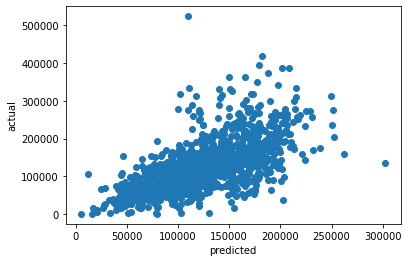

In [361]:
#['enet', 'gb', 'ridge', 'lasso']
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# OLS Model Attempt

In [373]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/a7c45963d1a677dd0a758900b58a662b3179f30b/QEPSampleCleaned.csv'
df = pd.read_csv(url)
df = df.drop('rowID', axis=1)
df = df.drop('CompletionDate', axis=1)
df = df.drop('DaysSinceStruck', axis=1)
# To identify the type of data
df.head()

,CumOil12Month,Operator,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,PSI_PerSqf_Thick,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM
0,325341.688,OVV,WOLFCAMP B,9925.000,2061.000,49,275.089,275.089,9.258,258.263,6818.863,0.106,439.838,22821.208,0.056,4150.973,0.426,0.011,3.112,0.169,0.257,0.943,5.559
1,211278.406,OVV,SPRABERRY LOWER,9478.000,2042.000,48,300.346,300.346,3.120,231.585,6149.570,2.476,7250.000,30333.523,0.055,2927.763,0.319,0.005,2.851,0.227,0.144,0.941,5.228
2,201117.609,OVV,SPRABERRY LOWER,9295.000,2145.000,53,299.140,299.140,228.466,228.466,5917.984,3.250,7250.000,16238.109,0.047,2230.759,0.445,0.006,1.977,0.173,0.177,0.944,5.218
3,297255.625,OVV,WOLFCAMP A,9894.000,1995.000,49,274.886,274.886,249.005,249.005,6560.600,2.525,8250.000,24069.540,0.048,3267.356,0.311,0.003,2.505,0.166,0.338,0.941,5.357
4,240883.188,OVV,WOLFCAMP B,10403.000,2007.000,49,291.223,291.223,219.828,219.828,6809.605,0.106,442.147,24158.275,0.057,4188.982,0.386,0.009,3.066,0.162,0.280,0.941,5.699


In [374]:
y = df.CumOil12Month
X = df.drop('CumOil12Month', axis=1)

In [376]:
# Import the OLS model from statsmodels
from statsmodels.formula.api import ols





# Set-up and fit the model in one step
# (format Y ~ X)
model = ols("""CumOil12Month ~ LateralLength_FT
                           + ProppantIntensity_LBSPerFT
                           + FluidIntensity_BBLPerFT
                           + HzDistanceToNearestOffsetAtDrill
                           + HzDistanceToNearestOffsetCurrent
                           + VtDistanceToNearestOffsetCurrent
                           + VtDistanceToNearestOffsetAtDrill
                           + WellDepth
                           + ReservoirThickness
                           + OilInPlace
                           + Porosity
                           + ReservoirPressure
                           + WaterSaturation
                           + StructureDerivative
                           + TotalOrganicCarbon
                           + ClayVolume
                           + CarbonateVolume
                           + Maturity
                           + TotalWellCost_USDMM""", data=df2).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          CumOil12Month   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     99.11
Date:                Tue, 19 Jul 2022   Prob (F-statistic):          7.36e-281
Time:                        16:42:23   Log-Likelihood:                -1563.6
No. Observations:                2301   AIC:                             3167.
Df Residuals:                    2281   BIC:                             3282.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 9.61372
Feature: 7, Score: 0.00000
Feature: 8, Score: 30.51944
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 48.38204
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 39.99774
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 70.86224


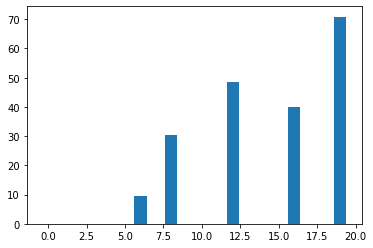

In [377]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Question Inspection
## Prob by Flud

In [384]:
import plotly.express as px

fig = px.scatter_3d(df, x='ProppantIntensity_LBSPerFT', y='FluidIntensity_BBLPerFT', z='CumOil12Month',color='Reservoir',width=1000, height=800)
fig.show()

In [ ]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/master/ShortLatWells2.csv'
df4 = pd.read_csv(url)
# To identify the type of data
df4.head(2)

In [ ]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/master/LongLatWells1.csv'
df5 = pd.read_csv(url)
# To identify the type of data
df5.head(2)

In [388]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go 
from scipy.interpolate import griddata

x = df.ProppantIntensity_LBSPerFT
y = df.FluidIntensity_BBLPerFT
z = df.CumOil12Month

#Create meshgrid for x,y
xi = np.linspace(min(df['ProppantIntensity_LBSPerFT']), max(df['ProppantIntensity_LBSPerFT']), num=100)
yi = np.linspace(min(df['FluidIntensity_BBLPerFT']), max(df['FluidIntensity_BBLPerFT']), num=100)

x_grid, y_grid = np.meshgrid(xi,yi)

#Grid data
z_grid = -griddata((df['ProppantIntensity_LBSPerFT'],df['FluidIntensity_BBLPerFT']),df['CumOil12Month'],(x_grid,y_grid),method='cubic')

# Plotly 3D Surface
fig = go.Figure(go.Surface(x=x_grid,y=y_grid,z=z_grid, colorscale='viridis'))

fig.show()

# Vertical by Horizontal

In [392]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/a7c45963d1a677dd0a758900b58a662b3179f30b/QEPSampleCleaned.csv'
df3 = pd.read_csv(url)
# To identify the type of data
df3.head(2)

,CumOil12Month,rowID,Operator,CompletionDate,DaysSinceStruck,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT,HzDistanceToNearestOffsetAtDrill,HzDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetCurrent,VtDistanceToNearestOffsetAtDrill,WellDepth,PSI_PerSqf_Thick,ReservoirThickness,OilInPlace,Porosity,ReservoirPressure,WaterSaturation,StructureDerivative,TotalOrganicCarbon,ClayVolume,CarbonateVolume,Maturity,TotalWellCost_USDMM
0,325341.688,1,OVV,2017-09-30,1751,WOLFCAMP B,9925.000,2061.000,49,275.089,275.089,9.258,258.263,6818.863,0.106,439.838,22821.208,0.056,4150.973,0.426,0.011,3.112,0.169,0.257,0.943,5.559
1,211278.406,2,OVV,2017-10-07,1744,SPRABERRY LOWER,9478.000,2042.000,48,300.346,300.346,3.120,231.585,6149.570,2.476,7250.000,30333.523,0.055,2927.763,0.319,0.005,2.851,0.227,0.144,0.941,5.228


In [394]:
import plotly.express as px
fig = px.scatter_3d(df3, x='VtDistanceToNearestOffsetCurrent', y='HzDistanceToNearestOffsetCurrent', z='CumOil12Month',color='Reservoir',width=1000, height=800)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [395]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/master/LongLatWells1.csv'
df5 = pd.read_csv(url)
# To identify the type of data
df5.head(2)

,CumOil12Month,rowID,Operator,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT
0,325341.688,1,OVV,WOLFCAMP B,9925,2061.000,49
1,240883.188,5,OVV,WOLFCAMP B,10403,2007.000,49


Short Lenghs - Prob by Fluid

In [397]:
fig = px.scatter_3d(df5, x='ProppantIntensity_LBSPerFT', y='FluidIntensity_BBLPerFT', z='CumOil12Month',color='Reservoir',width=1000, height=800)
fig.show()

In [399]:
url = 'https://raw.githubusercontent.com/alexbernal0/WQU/master/ShortLatWells2.csv'
df6 = pd.read_csv(url)
# To identify the type of data
df6.head(2)


,CumOil12Month,rowID,Operator,Reservoir,LateralLength_FT,ProppantIntensity_LBSPerFT,FluidIntensity_BBLPerFT
0,109156.711,10,OVV,WOLFCAMP A,7616,2026.000,51
1,110990.383,11,OVV,WOLFCAMP B,7664,1962.000,51


In [400]:
fig = px.scatter_3d(df6, x='ProppantIntensity_LBSPerFT', y='FluidIntensity_BBLPerFT', z='CumOil12Month',color='Reservoir',width=1000, height=800)
fig.show()